<a href="https://colab.research.google.com/github/435wldms/essa/blob/main/20230915_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델 훈련

# **4.1 선형 회귀**

* 선형 회귀 모델의 예측: yhat = ceta0 + ceta1* x1 + ceta2 * x2 + cetan * xn
>
n: 특성의 수, xi는 i번째 특성값, ceta는 j번째 모델 파라미터

* 성능 측정 지표: RMSE(평균 제곱근 오차)

**4.1.1 정규방정식**

* 정규방정식: 비용 함수를 최소화하는 ceta 값을 찾기 위한 방법
* ceta hat = ((x(t)*x)-1)*x(t)*y = 비용함수를 최소화하는 ceta 값

In [29]:
# 공식 테스트
import numpy as np

X = 2* np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [30]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [31]:
theta_best

array([[4.18033982],
       [2.94619617]])

* 원래 기대했던 4,3이 아닌 3.9,3으로 출력됨

In [32]:
# ceta hat 이용해 예측 수행
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.18033982],
       [10.07273216]])

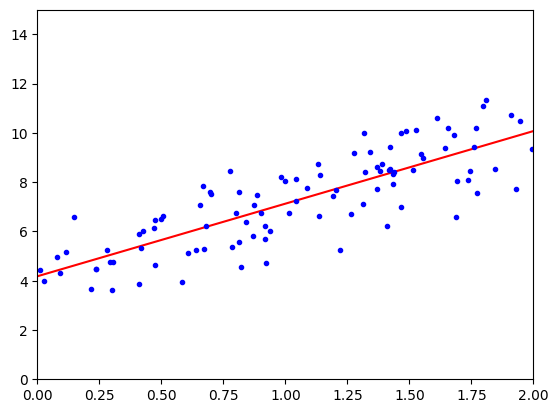

In [33]:
# 그래프로 예측 나타내기
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

* 사이킷런에서 선형 회귀 수행

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

lin_reg.intercept_, lin_reg.coef_

(array([4.18033982]), array([[2.94619617]]))

In [35]:
lin_reg.predict(X_new)

array([[ 4.18033982],
       [10.07273216]])

-> LinearRegression 클래스는 scipy.linalg.lstsq()를 기반으로 함

In [36]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y, rcond=1e-6)
theta_best_svd

array([[4.18033982],
       [2.94619617]])

-> 이 함수는 ceta hat을 계산해 줌 ((x+)*y)

* x+ = 유사역행렬 구하기

In [37]:
np.linalg.pinv(X_b).dot(y)

array([[4.18033982],
       [2.94619617]])

* 유사역행렬은 특잇값 분해(svd)라는 표준 행렬 분해 기법을 통해 계산됨
>
* 유사역행렬: v*(sigma+)*U(T)
>
* sigma+ : sigma를 구한 후, 어떤 임곗값보다 작은 수를 모두 0으로 바꾸고 0이 아닌 모든 값을 역수로 치환한 후 행렬을 전치한 것
>
* 유사역행렬은 언제나 구할 수 있기 때문에 정규방정식보다 더 효율적인 방식

**4.1.2 계산 복잡도**

* 역행렬을 계산하는 계산 복잡도는 일반적으로 O(n^(2.4))~ O(n^(3)) 사이
>
* LinearRegression의 svd 방법은 O(n^2)로, 특성의 개수가 2배가 되면 계산 시간은 4배가 됨

# **4.2 경사하강법**

* 경사하강법은 일반적인 최적화 알고리즘으로, 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것
>
* 임의의 벡터 ceta로 시작해서 조금씩 비용함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상
>
* 스텝의 크기를 의미하는 학습률 하이퍼파라미터에 따라 진행
>
* 문제점: 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴, 오른쪽에서 시작하면 시간이 오래 걸리고 일찍 멈추어 전역 최솟값에 도달하지 못함
>
* 그러나 MSE는 볼록함수이므로 하나의 전역 최솟값만 있고 지역 최솟값이 없음 -> 웬만하면 전역 최솟값에 가깝게 근접
>
* 특성 스케일을 적용해야 최솟값에 효율적인 방법으로 도달

**4.2.1 배치 경사 하강법**

* ceta가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산 -> 편도함수
* delta MSE(ceta)는 비용 함수의 편도함수를 모두 담고 있음
* 경사하강법의 스텝: ceta - lr*(delta MSE(ceta))

In [38]:
# 위의 알고리즘 구현
eta = 0.1
n_iterations = 1000
m=100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta*gradients

theta

array([[4.18033982],
       [2.94619617]])

* learning rate이 너무 작거나 크면 적절하지 못함
>
* grid 탐색을 사용해 적절한 학습률 찾기 + 너무 오래걸리지 않기 위해서 반복 횟수 제한하면 됨

**4.2.2 확률적 경사 하강법**

* 전체 데이터 세트를 사용하는 배치 경사 하강법과 달리, 확률적 경사 하강법은 한 개의 샘플을 무작위로 선택하고 그것에 대한 그레디언트 계산
>
* 하지만 확률적이기 때문에 배치 경사 하강법보다 훨씬 불안정하여 비용함수가 최솟값에 다다를 때까지 위아래로 요동침 -> 지역 최솟값을 건너뛸 수 있어 전역 최솟값을 찾을 가능성이 높음 but 전역 최솟값에도 다다르지 못할 수 있으므로 학습률을 점진적으로 감소시키기

In [39]:
# 확률적 경사 하강법 구현
n_epochs = 50
t0, t1 = 5,50

def learning_schedule(t):
  return t0 / (t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index: random_index+1]
    yi = y[random_index: random_index+1]
    gradients = 2* xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m + i)
    theta = theta - eta*gradients

* 한 반복에서 m번 되풀이되도록 함
* 샘플을 무작위로 선택하기 때문에 한 에포크에서 특정 샘플이 여러 번 선택될 수 있음

In [40]:
theta

array([[4.13707228],
       [2.92157748]])

* SGDRegressor 클래스를 사용하여 제곱 오차 비용 함수 최적화
* max_iter = 1000, tol = 0.001(한 에포크에서 0.001보다 적게 손실이 줄어들 때까지), eta=0.1

In [41]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [42]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.10977053]), array([2.93938518]))

**4.2.3 미니 배치 경사 하강법**

* 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레디언트 계산
* 미니 배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달할 것이지만 지역 최솟값에서 빠져나오기는 더 힘들 수 있음

# **4.3 다항 회귀**

* 가진 데이터가 단순한 직선보다 복잡한 형태인 경우 다항 회귀 사용

In [43]:
# 2차 방정식으로 비선형 데이터 생성
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [44]:
# 사이킷런의 PolynomialFeatures 사용
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.23811844])

In [45]:
X_poly[0]
# 원래 값, 제곱 값

array([-2.23811844,  5.00917414])

In [46]:
# 확장된 훈련 데이터로 Linear Regression 적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.82805267]), array([[0.97908771, 0.5609085 ]]))

* polynomialfeatures 적용 시 주어진 차수까지 특성 간의 모든 교차항도 추가(a^3, a^2, a*b^2 ...)

# **4.4 학습 곡선**

* 고차 다항 회귀 적용 시 훨썬 더 훈련 데이터에 잘 맞추려 함 -> 심각하게 훈련 데이터에 과적합
>
* 얼마나 과적합되었는지 알아보기 위해 교차 검증 점수 확인 or 학습 곡선을 살펴봄

In [47]:
# 모델의 학습 곡선 그리기
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='훈련 세트')
  plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='검증 세트')

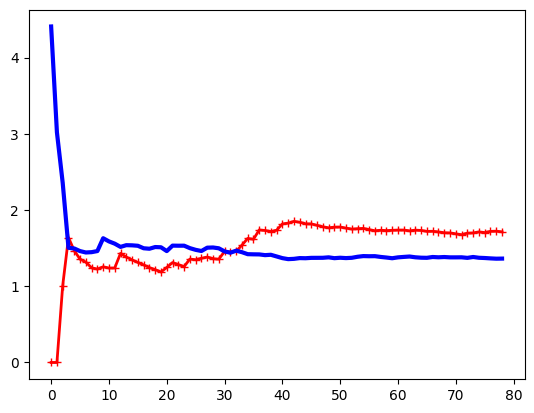

In [48]:
# 단순 선형 회귀 모델 학습 곡선
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

-> 모델이 훈련 데이터에 과소 적합

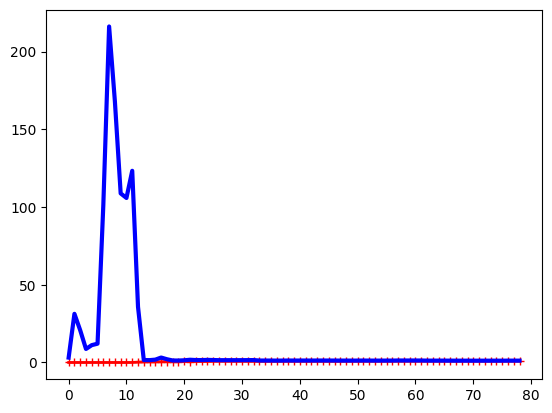

In [49]:
# 10차 다항 회귀 모델의 학습 곡선 그리기
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_features',PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg',LinearRegression()),
])

plot_learning_curves(polynomial_regression,X,y)

-> 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮고, 두 곡선 사이에 공간이 있음 = 과대적합모델

* 일반화 오차: 편향(잘못된 가정으로 인함), 분산(모델이 과도하게 민감함), 줄일 수 없는 오차(데이터 자체의 잡음)
* 모델의 복잡도에 따라 편향과 분산이 트레이드오프 됨

# **4.5 규제가 있는 선형 모델**
* 릿지, 라쏘, 엘라스틱넷
* 규제가 있는 모델은 모델링 전에 데이터 스케일을 맞추는 것이 중요함

**4.5.1 릿지 회귀**

* 규제가 추가된 선형 회귀 버전, 훈련하는 동안에만 비용함수에 추가하고 훈련이 끝나면 규제가 없는 성능 지표로 평가
* 릿지 회귀의 비용 함수: MSE(ceta)+alpha*(1/2)*(ceta^2의 합)
* alpha=0이면 선형 회귀와 같아짐, 너무 크면 모든 가중치가 거의 0에 가까워지고 데이터의 평균을 지나는 수평선이 됨

In [50]:
# 정규 방정식을 이용해 릿지 회귀 수행
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver ='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.22690162]])

In [51]:
# 확률적 경사 하강법 사용
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.22268461])

**4.5.2 라쏘 회귀**

* 라쏘 회귀의 비용 함수: MSE(ceta)+alpha*(abs(ceta)의 합)
* 릿지 회귀와는 달리 덜 중요한 특성의 가중치를 제거하려고 함-> 자동으로 특성 선택을 하고 희소 모델을 만듦

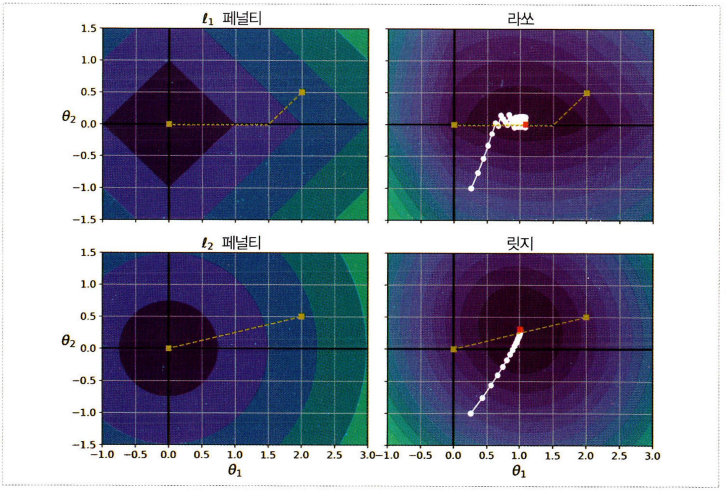

1) 왼쪽 위 그래프: l1 손실(abs(ceta1)+abs(ceta2)), 초기값: 2,0.5로 지정 -> ceta2 먼저 0에 도달한 후 ceta1 도달
>
2) 오른쪽 위 그래프: 라쏘 손실 함수, 초기값: 0.25,-1로 지정 -> 하얀 작은 원의 움직임이 최적화 과정(전역 최적점에 도달), alpha 증가하면 전역 최적점이 왼쪽으로, 감소하면 오른쪽으로 이동
>
3) 왼쪽 아래 그래프: l2 손실 사용, 직선 경로로 이동
>
4) 오른쪽 아래 그래프: 릿지 손실 함수, 전역 최적점에 가까워질수록 그레디언트가 작아지며 진동이 없음, alpha 값을 증가시키면 최적 파라미터가 원점에 가까워지지만 완전히 0이 되지는 못함

In [52]:
# 라쏘를 활용한 사이킷런 예제
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.18296223])

**4.5.3 엘라스틱넷**

* 릿지와 라쏘 회귀를 절충한 모델로, 규제항은 릿지와 회귀의 규제항의 합, 혼합 정도는 혼합 비율 r로 조절(r=0: 릿지, r=1: 라쏘)
* 엘라스틱넷 비용 함수: MSE(ceta)+r*alpha*sigma(abs(ceta))+ ((1-r)/2)*alpha*sigma(ceta^2)

* 약간의 규제가 있는 것이 대부분 좋기 때문에 평범한 선형 회귀는 피하고 라쏘나 엘라스틱넷이 좋음. (릿지와 달리 불필요한 특성의 가중치는 0으로 만들어 줌)

In [53]:
# 엘라스틱넷을 활용한 예제
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.18085524])

**4.5.4 조기 종료**

* '검증' 에러가 최솟값에 도달하면 바로 훈련 중지

In [ ]:
# 조기 종료 구현을 위한 코드
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

# 데이터 준비
poly_scaler = Pipeline([
    ('poly_features',PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol = -np.infty, warm_start=True, penalty=None, learning_rate='constant',eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

# **4.6 로지스틱 회귀**

**4.6.1 확률 추정**

* 입력 특성의 가중치 합을 계산하여 결괏값의 로지스틱을 출력
* 로지스틱 회귀 모델의 확률 추정식: sigmoid(ceta.T * x)
* t가 음수: sigmoid(t)<0.5, t가 양수: sigmoid(t)>=0.5
-> 음수면 0, 양수면 1

**4.6.2 훈련과 비용 함수**

* 양성(y=1) 샘플에 대해서는 높은 확률, 음성(y=0) 샘플에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터(ceta) 찾기
* 비용 함수: y=1 -log(p hat), y=0 -log(1 - p hat)

* 로그 손실: 전체 훈련 세트에 대한 비용 함수는 모든 훈련 샘플의 비용을 평균한 것
* 이 함수는 볼록함수이므로 경사 하강법이 전역 최솟값을 찾는 것 보장

**4.6.3 결정 경계**

In [55]:
# 꽃잎의 너비를 기반으로 iris-versicolor 종 감지
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [56]:
X = iris['data'][:,3:] # 꽃잎의 너비
y = (iris['target']==2).astype(np.int) # iris-virginica면 1, 아니면 0

<ipython-input-56-9594497e7573>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris['target']==2).astype(np.int) # iris-virginica면 1, 아니면 0


In [57]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

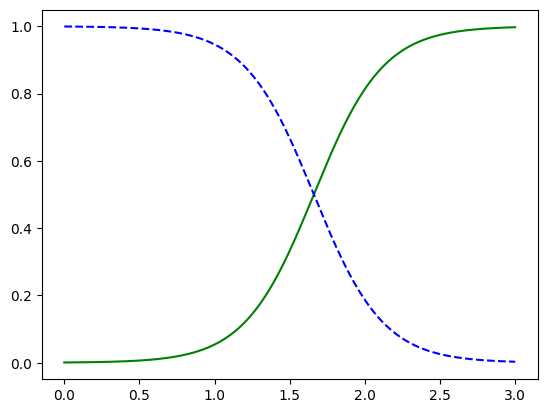

In [59]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],'g-',label='Iris virginica')
plt.plot(X_new, y_proba[:,0],'b--',label='Not Iris virginica')

-> 1.6cm 근방에서 결정 경계가 만들어짐
* iris-verginica의 꽃잎 너비: 1.4 ~ 2.5cm, 다른 붓꽃: 0.1~1.8cm
-> 2cm 이상이면 iris-verginica로 강하게 확신, 1cm 아래면 iris-verginica가 아니라고 강하게 확신

In [60]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

* 로지스틱 회귀 모델도 l1, l2 페널티를 사용해 규제할 수 있지만 사이킷런은 l2를 기본으로 함

**4.6.4 소프트맥스 회귀**

* 다중 클래스를 지원하도록 일반화한 다항 로지스틱 회귀를 의미
* 샘플 x에 대해 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 s(x)를 계산하고 소프트맥스 함수를 적용하여 클래스의 확률을 추정
* 가장 높은 확률을 가지는 클래스를 선택
* 크로스 엔트로피 비용 함수를 최소화하는 것 선택(낮은 확률을 예측하는 모델은 억제해 줌)
* 각 클래스에 대한 그레디언트 벡터도 계산할 수 있으므로 경사하강법 사용 가능

In [65]:
# 소프트맥스 회귀를 사용해 붓꽃 3개의 클래스로 분류(logistic에서 'multinomial' 적용)
from scipy.special import softmax

X = iris['data'][:,(2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver = 'lbfgs',C=10) # lbfgs : 소프트맥스 회귀를 지원하는 알고리즘 지정
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [66]:
softmax_reg.predict([[5,2]])

array([2])

In [67]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

-> 94%의 확률로 iris-verginica로 예측
* 3등분 -> 결정 경계가 만나는 지점에서는 모두 33%의 추정 확률을 가짐